In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
# Scrape a single match shots
base_url = 'https://understat.com/match/'
# Type the match id
#match = str(input('Please enter the match id: '))
match = '15730' # Atalanta vs Juventus
url = base_url+match

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [4]:
#get only the shotsData
strings = scripts[1].string

In [5]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22415767\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.91\\x22,\\x22Y\\x22\\x3A\\x220.5670000076293945\\x22,\\x22xG\\x22\\x3A\\x220.04180918633937836\\x22,\\x22player\\x22\\x3A\\x22Luis\\x20Muriel\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221229\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2215730\\x22,\\x22h_team\\x22\\x3A\\x22Atalanta\\x22,\\x22a_team\\x22\\x3A\\x22Juventus\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222021\\x2D04\\x2D18\\x2013\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Matteo\\x20Pessina\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22415768\\x22,\\x22minute\\x22\\x3A\\x2212\\x22,\\x22result\\x22\\x3A\\x22Missed

In [6]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)

In [7]:
# The JSON consists of home (h) and away (a) objects

data['h'][0]

{'id': '415767',
 'minute': '10',
 'result': 'BlockedShot',
 'X': '0.91',
 'Y': '0.5670000076293945',
 'xG': '0.04180918633937836',
 'player': 'Luis Muriel',
 'h_a': 'h',
 'player_id': '1229',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'Head',
 'match_id': '15730',
 'h_team': 'Atalanta',
 'a_team': 'Juventus',
 'h_goals': '1',
 'a_goals': '0',
 'date': '2021-04-18 13:00:00',
 'player_assisted': 'Matteo Pessina',
 'lastAction': 'Aerial'}

In [8]:
# The JSON consists of home (h) and away (a) objects

data['a'][0]

{'id': '415765',
 'minute': '8',
 'result': 'BlockedShot',
 'X': '0.735999984741211',
 'Y': '0.38799999237060545',
 'xG': '0.016748834401369095',
 'player': 'Adrien Rabiot',
 'h_a': 'a',
 'player_id': '3291',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'LeftFoot',
 'match_id': '15730',
 'h_team': 'Atalanta',
 'a_team': 'Juventus',
 'h_goals': '1',
 'a_goals': '0',
 'date': '2021-04-18 13:00:00',
 'player_assisted': 'Juan Cuadrado',
 'lastAction': 'Pass'}

In [9]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

data_all = json_normalize(data, sep = "_")
data_home = json_normalize(data['h'], sep = "_")
data_away = json_normalize(data['a'], sep = "_")

In [10]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,415765,8,BlockedShot,0.735999984741211,0.38799999237060545,0.016748834401369095,Adrien Rabiot,a,3291,OpenPlay,2020,LeftFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Juan Cuadrado,Pass
1,415766,9,BlockedShot,0.8390000152587891,0.664000015258789,0.04239239543676376,Adrien Rabiot,a,3291,OpenPlay,2020,LeftFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,None,None
2,415769,13,BlockedShot,0.9219999694824219,0.3290000152587891,0.05692547559738159,Juan Cuadrado,a,1089,OpenPlay,2020,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Paulo Dybala,Chipped
3,415770,15,MissedShots,0.7219999694824218,0.59,0.016770221292972565,Federico Chiesa,a,1433,OpenPlay,2020,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Juan Cuadrado,Pass
4,415776,29,MissedShots,0.8919999694824219,0.45799999237060546,0.01951742172241211,Matthijs de Ligt,a,7902,FromCorner,2020,Head,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,None,Aerial


In [11]:
#df['cum_away_shots'] = df['away_shots'].cumsum()
#df["A"] = pd.to_numeric(df["A"], downcast="float")

#Converting from string to float
data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")

#Converting from string to int
data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")

#Getting a column with cumulative result
data_home['cumsum_xg'] = data_home['xG'].cumsum()
data_away['cumsum_xg'] = data_away['xG'].cumsum()

In [12]:
data_home.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,415767,10,BlockedShot,0.91,0.5670000076293945,0.041809,Luis Muriel,h,1229,OpenPlay,...,Head,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Matteo Pessina,Aerial,0.041809
1,415768,12,MissedShots,0.7530000305175781,0.28899999618530275,0.013549,Duván Zapata,h,1148,OpenPlay,...,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Matteo Pessina,Pass,0.055358
2,415771,18,BlockedShot,0.8230000305175781,0.2589999961853027,0.022415,Joakim Maehle,h,9233,OpenPlay,...,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Matteo Pessina,Pass,0.077773
3,415772,19,BlockedShot,0.8680000305175781,0.575,0.033415,Rafael Toloi,h,1484,FromCorner,...,Head,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,None,None,0.111189
4,415773,22,BlockedShot,0.7880000305175782,0.41900001525878905,0.027361,Luis Muriel,h,1229,OpenPlay,...,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Berat Gjimshiti,Pass,0.138550


In [13]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,415765,8,BlockedShot,0.735999984741211,0.38799999237060545,0.016749,Adrien Rabiot,a,3291,OpenPlay,...,LeftFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Juan Cuadrado,Pass,0.016749
1,415766,9,BlockedShot,0.8390000152587891,0.664000015258789,0.042392,Adrien Rabiot,a,3291,OpenPlay,...,LeftFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,None,None,0.059141
2,415769,13,BlockedShot,0.9219999694824219,0.3290000152587891,0.056925,Juan Cuadrado,a,1089,OpenPlay,...,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Paulo Dybala,Chipped,0.116067
3,415770,15,MissedShots,0.7219999694824218,0.59,0.016770,Federico Chiesa,a,1433,OpenPlay,...,RightFoot,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,Juan Cuadrado,Pass,0.132837
4,415776,29,MissedShots,0.8919999694824219,0.45799999237060546,0.019517,Matthijs de Ligt,a,7902,FromCorner,...,Head,15730,Atalanta,Juventus,1,0,2021-04-18 13:00:00,None,Aerial,0.152354


In [14]:
# Creating a df with the data we need only
home_df = data_home[['minute', 'cumsum_xg']]
away_df = data_away[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])


In [15]:
a_xg, a_min

([0.0,
  0.016748834,
  0.05914123,
  0.11606671,
  0.13283694,
  0.15235436,
  0.20493601,
  0.54358536,
  0.5574306,
  0.6814991,
  0.7540568,
  0.79565936],
 [0, 8, 9, 13, 15, 29, 29, 33, 38, 43, 45, 75])

Text(0.5, 1.0, 'Atalanta (white) vs Juventus (red)')

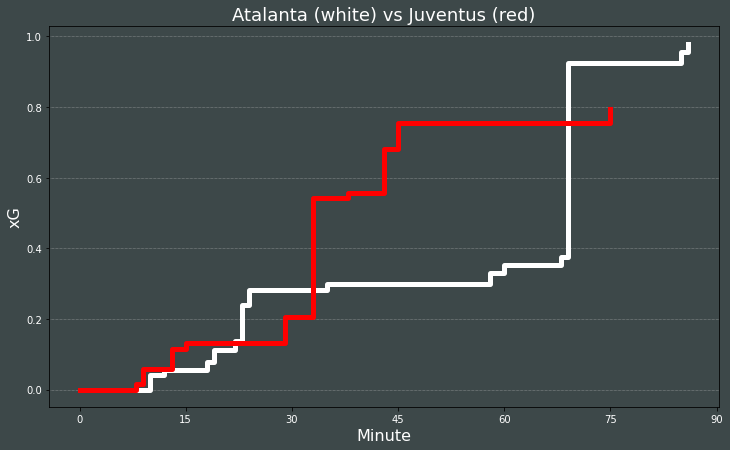

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option

plt.title(data_home.iloc[0]['h_team'] + ' (white) vs ' + data_home.iloc[0]['a_team'] + ' (red)', color='white', fontsize=18)

#plt.step(h_min, h_xg)
#plt.step(a_min, a_xg)